# Web Crawling 3 - 동적 웹페이지

## Javascript 웹페이지
- 웹페이지 중에는 Javascript 코드와 함께 작성된 경우가 많은데, 이러한 웹 페이지는 동적인 웹페이지로 기능하기 때문에 requests로 HTML 소스를 가져오면 웹 브라우저로 보는 것과 다를 수 있다
- Selenium을 이용하면 사람이 웹 브라우저에서 보는 데이터를 가져올 수 있다

### 스타벅스 홈페이지
- 스타벅스 홈페이지는 Javascript 코드를 사용한다
- 일반적인 시도로는 추출되지 않는 것을 확인한다

https://www.starbucks.co.kr/menu/drink_list.do

In [1]:
#container > div.content > div.product_result_wrap.product_result_wrap01 > div > dl > dd:nth-child(2) > div.product_list > dl > dd:nth-child(2) > ul > li:nth-child(1) > dl > dd

In [7]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.starbucks.co.kr/menu/drink_list.do'
res = requests.get(url)

soup = BeautifulSoup(res.text, 'lxml')

a = soup.select('#container > div.content > div.product_result_wrap.product_result_wrap01 > div > dl > dd:nth-child(2) > div.product_list > dl > dd:nth-child(2) > ul > li:nth-child(1) > dl > dd')
print(a)

[]


#### Selenium을 이용한 추출
- 셀레니움을 이용해 Javascript가 만든 HTML 소스를 모두 가져온 후,
- 원하는 내용을 가져오는 방법을 취한다
- 먼저 Copy Selector의 내용을 다음과 같이 변경하여 중간 부분만 가져온다
    - 앞 부분부터 가져와도 되지만, 중복되는 부분이 없으므로 중간부터 가져옴
    - 마지막 부분까지 가져오면 메뉴 이름만 가져오게 됨

CSS, Cascading Style Sheet ; 계층형 스타일 구조.

In [12]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

# ChromeDriver 설치 및 경로 설정
driver_path = ChromeDriverManager().install()

# 지정된 경로로 ChromeDriver 실행
driver = webdriver.Chrome(driver_path)

url = 'https://www.starbucks.co.kr/menu/drink_list.do'
driver.get(url)
driver.implicitly_wait(3)

html = driver.page_source
soup = BeautifulSoup(html, 'lxml')

drink_products = soup.select('div.product_list dd ul li dl')


In [14]:
print(drink_products[0])

<dl> <dt> <a class="goDrinkView" href="javascript:void(0)" prod="9200000004544"><img alt="씨솔트 카라멜 콜드 브루" src="https://image.istarbucks.co.kr/upload/store/skuimg/2024/04/[9200000004544]_20240423124241716.jpg"/></a> <ul> <li><img alt="NEW" src="//image.istarbucks.co.kr/common/img/menu/mark01.png"/></li> <li><img alt="시즌 한정" src="//image.istarbucks.co.kr/common/img/menu/mark02.png"/></li> </ul> </dt> <dd>씨솔트 카라멜 콜드 브루</dd> </dl>


In [15]:
driver_path

'C:\\Users\\Caelu\\.wdm\\drivers\\chromedriver\\win64\\125.0.6422.141\\chromedriver-win32/chromedriver.exe'

##### 메뉴 이름과 사진 링크 추출
- 앞의 추출 결과를 바탕으로 메뉴의 이름과 사진의 링크를 추출할 수 있다.

In [20]:
manu_name = drink_products[0].select_one('dd').get_text()
print(manu_name)

manu_photo = drink_products[0].select_one('a img')['src']
print(manu_photo)

씨솔트 카라멜 콜드 브루
https://image.istarbucks.co.kr/upload/store/skuimg/2024/04/[9200000004544]_20240423124241716.jpg


In [23]:
import requests

path = "D:\\Users\\Caelu\\Downloads\\"

response = requests.get(manu_photo)

with open(path + manu_name + '.jpg', 'wb') as f :
    f.write(response.content)
    print(manu_name+' is saved')

씨솔트 카라멜 콜드 브루 is saved


In [24]:
drink_product = soup.select('div.product_list dl dd ul li dl')
print(drink_products[0])
driver.quit()

<dl> <dt> <a class="goDrinkView" href="javascript:void(0)" prod="9200000004544"><img alt="씨솔트 카라멜 콜드 브루" src="https://image.istarbucks.co.kr/upload/store/skuimg/2024/04/[9200000004544]_20240423124241716.jpg"/></a> <ul> <li><img alt="NEW" src="//image.istarbucks.co.kr/common/img/menu/mark01.png"/></li> <li><img alt="시즌 한정" src="//image.istarbucks.co.kr/common/img/menu/mark02.png"/></li> </ul> </dt> <dd>씨솔트 카라멜 콜드 브루</dd> </dl>


In [25]:
menu_names_photoes = []
for product in drink_products:
    menu_name = product.select_one('dd').get_text()
    menu_photo = product.select_one('a img')['src']
    menu_names_photoes.append((menu_name, menu_photo))
    
for i, item in enumerate(menu_names_photoes):
    print('index :', i)
    print('menu :', item[0])
    print('photo :', item[1])
    print('*'*10)


index : 0
menu : 씨솔트 카라멜 콜드 브루
photo : https://image.istarbucks.co.kr/upload/store/skuimg/2024/04/[9200000004544]_20240423124241716.jpg
**********
index : 1
menu : 나이트로 바닐라 크림
photo : https://image.istarbucks.co.kr/upload/store/skuimg/2021/04/[9200000002487]_20210426091745467.jpg
**********
index : 2
menu : 나이트로 콜드 브루
photo : https://image.istarbucks.co.kr/upload/store/skuimg/2021/04/[9200000000479]_20210426091843897.jpg
**********
index : 3
menu : 돌체 콜드 브루
photo : https://image.istarbucks.co.kr/upload/store/skuimg/2021/04/[9200000002081]_20210415133656839.jpg
**********
index : 4
menu : 리저브 나이트로
photo : https://image.istarbucks.co.kr/upload/store/skuimg/2021/02/[9200000002407]_20210225095106743.jpg
**********
index : 5
menu : 리저브 콜드 브루
photo : https://image.istarbucks.co.kr/upload/store/skuimg/2024/03/[9200000002093]_20240318144604476.jpg
**********
index : 6
menu : 막걸리향 크림 콜드 브루
photo : https://image.istarbucks.co.kr/upload/store/skuimg/2024/05/[9200000005282]_20240509131200017.jpg
*

In [27]:
import requests
import random
import time 

path = "D:\\Users\\Caelu\\Downloads\\menu_pics\\"

for i, item in enumerate(menu_names_photoes):
    response = requests.get(item[1])
    
    with open(path+item[0]+'.jpg', 'wb') as f :
        f.write(response.content)
        
    print(i, '번째 사진 저장', sep='')
    time.sleep(random.uniform(0.25,1.25))


0번째 사진 저장
1번째 사진 저장
2번째 사진 저장
3번째 사진 저장
4번째 사진 저장
5번째 사진 저장
6번째 사진 저장
7번째 사진 저장
8번째 사진 저장
9번째 사진 저장
10번째 사진 저장
11번째 사진 저장
12번째 사진 저장
13번째 사진 저장
14번째 사진 저장
15번째 사진 저장
16번째 사진 저장
17번째 사진 저장
18번째 사진 저장
19번째 사진 저장
20번째 사진 저장
21번째 사진 저장
22번째 사진 저장
23번째 사진 저장
24번째 사진 저장
25번째 사진 저장
26번째 사진 저장
27번째 사진 저장
28번째 사진 저장
29번째 사진 저장
30번째 사진 저장
31번째 사진 저장
32번째 사진 저장
33번째 사진 저장
34번째 사진 저장
35번째 사진 저장
36번째 사진 저장
37번째 사진 저장
38번째 사진 저장
39번째 사진 저장
40번째 사진 저장
41번째 사진 저장
42번째 사진 저장
43번째 사진 저장
44번째 사진 저장
45번째 사진 저장
46번째 사진 저장
47번째 사진 저장
48번째 사진 저장
49번째 사진 저장
50번째 사진 저장
51번째 사진 저장
52번째 사진 저장
53번째 사진 저장
54번째 사진 저장
55번째 사진 저장
56번째 사진 저장
57번째 사진 저장
58번째 사진 저장
59번째 사진 저장
60번째 사진 저장
61번째 사진 저장
62번째 사진 저장
63번째 사진 저장
64번째 사진 저장
65번째 사진 저장
66번째 사진 저장
67번째 사진 저장
68번째 사진 저장
69번째 사진 저장
70번째 사진 저장
71번째 사진 저장
72번째 사진 저장
73번째 사진 저장
74번째 사진 저장
75번째 사진 저장
76번째 사진 저장
77번째 사진 저장
78번째 사진 저장
79번째 사진 저장
80번째 사진 저장
81번째 사진 저장
82번째 사진 저장
83번째 사진 저장
84번째 사진 저장
85번째 사진 저장
86번째 사진 저장
87번째 사진 저장
88번째 사진 저장
89번째 사진 저장
90번째 사진 저장
91번째 사진 저

## iframe
inline frame

- In-line frame의 약자로 다른 HTML 페이지를 포함시킨 중첩 브라우저
- iframe을 사용하면 다른 웹 페이지의 내용을 제한없이 넣을 수 있다
- 단, iframe은 보안에 취약하다
    - 쿠키 관련
- iframe으로 작성된 내용은 동적 웹페이지의 경우와 같이 현재 웹 브라우저에서는 보여도 직접 추출할 수 없으나, 역시 Selenium을 이용하면 웹 브라우저에서 보는 데이터를 가져올 수 있다

### 중고나라 카페
- https://cafe.naver.com/joonggonara 에서 게시글 제목을 가져오려고 한다
- “전체글보기”로 들어가서
- 현재 보이는 내용의 일부를 선택해 Copy > Copy Selector 로 링크를 가져온다

(추출 시도)

In [28]:
#main-area > div:nth-child(4) > table > tbody > tr:nth-child(4) > td.td_article > div.board-list > div > a

In [29]:
import requests
from bs4 import BeautifulSoup

url = 'https://cafe.naver.com/joonggonara'

res = requests.get(url)
soup = BeautifulSoup(res.text, 'lxml')

a = soup.select('#main-area > div:nth-child(4) > table > tbody > tr:nth-child(4) > td.td_article > div.board-list > div > a')
print(a)

[]


#### 검색창 id 확인
name = 'query'
- id = 'topLayerQueryInput'
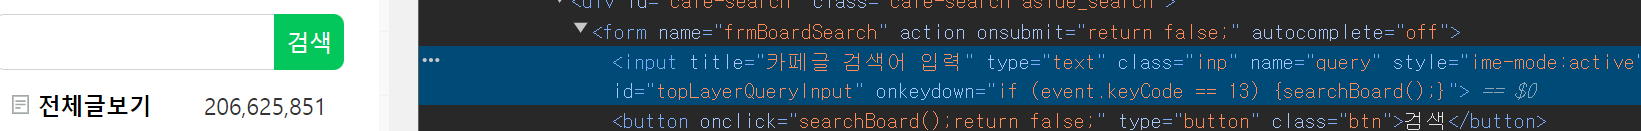

#### iframe 태그 찾기
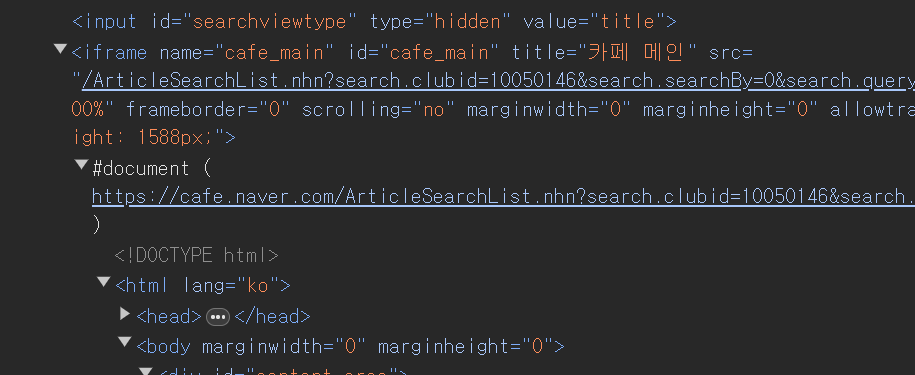

요소 선택 아이콘 으로 게시글 영역을 포괄하여 iframe 태그를 찾는다
- name과 id의 value가 모두 ‘cafe_main’이다

#### 목록 태그 찾기
- 게시물의 목록은
- #main-area > div > table > tbody > tr 내에 있음을 확인한다

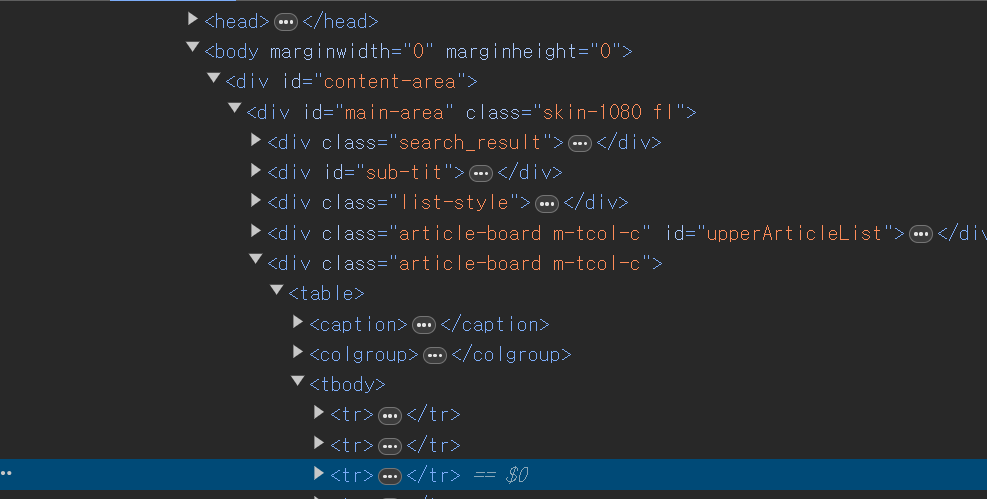

In [30]:
#main-area > div:nth-child(5) > table > tbody > tr

#### 다음 페이지 버튼 찾기
- 페이지를 넘기는 버튼의 XPath를 찾는다.
- Copy > Copy XPath

//*[@id="main-area"]/div[7]/a[11]

In [2]:
from selenium.webdriver import Chrome
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
from bs4 import BeautifulSoup
import pandas as pd

# ChromeDriver 설치 및 경로 설정
driver_path = ChromeDriverManager().install()

# 지정된 경로로 ChromeDriver 실행
driver = Chrome(driver_path)

search_query = input('어떤 상품의 정보를 알려드릴까요? \n: ')

url = 'https://cafe.naver.com/joonggonara'
driver.get(url)
driver.implicitly_wait(3)

element = driver.find_element('name', 'query')
element.send_keys(search_query)
element.send_keys(Keys.ENTER)
time.sleep(2)

#### frame 전환

In [3]:
driver.switch_to.frame('cafe_main') # iframe을 driver가 보게 한다.

html = driver.page_source
soup = BeautifulSoup(html, 'lxml')

# 제목들이 있는 곳 까지 진입
titles = soup.select('#main-area > div > table > tbody > tr')
title_txt=[] # 변수 초기화

#### 제목 반복 추출

In [15]:
for i in range(1,4):  # 1, 2, 3 페이지까지
    for title in titles:
        list = title.select_one('td >div > div > a').text
        # print(list)
        title_txt.append(' '. join(list.split()))
        
    print(f'----{i} 번째 페이지 완료')
    if i < 3 : # 다음 페이지로 넘어가는 버튼 클릭
        driver.find_element(By.XPATH, f'//*[@id="main-area"]/div[7]/a[{i}+1]').click()
        
title_df = pd.DataFrame(title_txt)
print(title_df)

----1 번째 페이지 완료
----2 번째 페이지 완료
----3 번째 페이지 완료
                                     0
0        윤하소극장콘서트7월7일1층E구역정중앙2연석양도합니다.
1                     윤하소극장콘서트7/4(목)양도
2                            윤하7/112연석
3                   윤하소극장콘서트7/4,7/11양도
4                윤하소극장콘서트빛나는여름좌석양도합니다.
..                                 ...
535  [구매] 윤하 일본정규 2집 히토츠소라노시타 미개봉 구합니다
536                7/3 윤하 소극장 콘서트 원가양도
537         윤하 7/10 소극장 공연 티켓 1장 양도합니다
538        윤하 소극장 콘서트 막콘 7월 14일 B구역 2열
539                       윤하 공식 응원봉 판매

[540 rows x 1 columns]


In [16]:
driver.close()